In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

In [22]:
import scipy
import pylab
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import scipy.cluster.hierarchy

In [3]:
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster

In [14]:
df = pd.read_csv("cars_clus.csv",encoding = "ISO-8859-1",low_memory=False)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [15]:
df.describe()

,partition
count,159.000000
mean,0.012579
std,0.111799
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
#nan Cleaning
df= df.dropna()
#cleaning unpleasent Data
df[[ 'sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,59.112316,18.031538,0.247863,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.117949,3.401179,0.0
std,75.058933,11.605632,0.433629,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404164,1.337862,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000,0.0
50%,32.299000,14.010000,0.000000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,3.475000,0.0
75%,76.029000,19.875000,0.000000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,4.331000,0.0
max,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,6.293000,0.0


In [20]:
#In this section, all rows from which a member has been removed are removed so 
#                             that we can read the numbers in equal rows from different parameters.
df=df.reset_index(drop=True)
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,59.112316,18.031538,0.247863,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.117949,3.401179,0.0
std,75.058933,11.605632,0.433629,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404164,1.337862,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,16.767000,11.240000,0.000000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,2.819000,0.0
50%,32.299000,14.010000,0.000000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,3.475000,0.0
75%,76.029000,19.875000,0.000000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,4.331000,0.0
max,540.561000,67.550000,1.000000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,6.293000,0.0


# Clustering using (Scipy)

In [21]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
#Normalize 
x = featureset.values # pandas --> numpy
min_max_scaler = MinMaxScaler()
Data = min_max_scaler.fit_transform(x)
Data[0:10]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

In [30]:
#Calculate Points Distance --> distanceMatrix
size = Data.shape[0]
distanceMatrix = scipy.zeros([size,size])
for i in range(size):
    for j in range(size):
        distanceMatrix[i,j] = scipy.spatial.distance.euclidean(Data[i], Data[j])

hierarchyMaker = hierarchy.linkage(distanceMatrix, 'complete')
distanceMatrix

C:\Users\ABTIN\AppData\Local\Temp/ipykernel_4508/3798564224.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  distanceMatrix = scipy.zeros([size,size])
C:\Users\ABTIN\AppData\Local\Temp/ipykernel_4508/3798564224.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hierarchyMaker = hierarchy.linkage(distanceMatrix, 'complete')


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [32]:
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

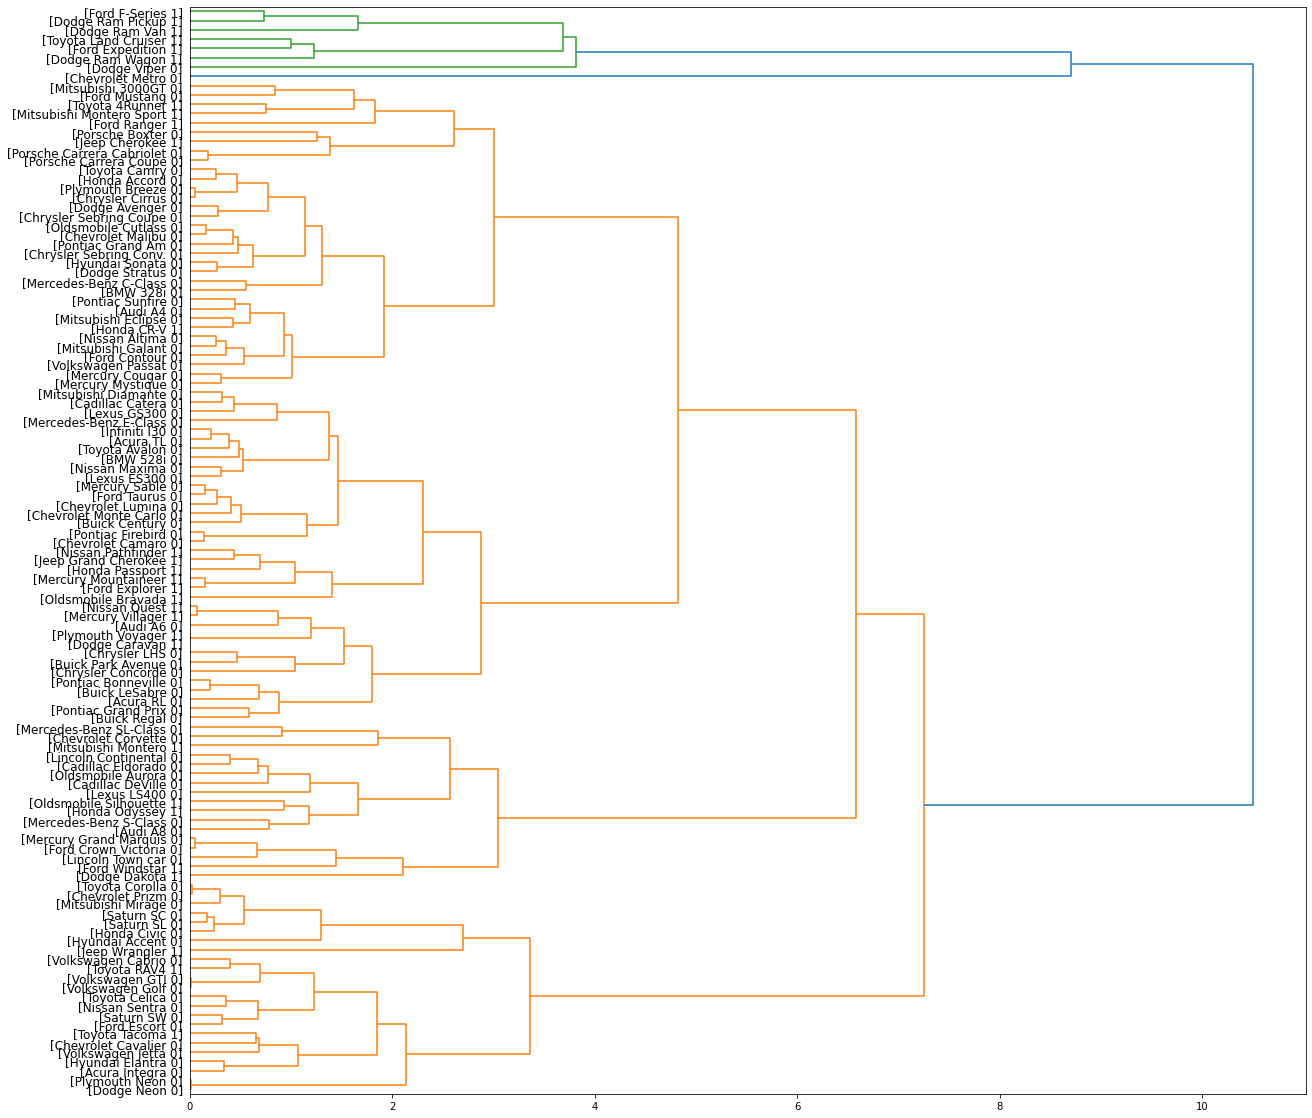

In [54]:
Figure = pylab.figure(figsize=(20,20))
dendroGram = hierarchy.dendrogram(hierarchyMaker,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# Clustering using (scikit-learn)

In [47]:
#distans Matrix --> machine calculate
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(Data,Data) 
distance_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

C:\Users\ABTIN\AppData\Local\Temp/ipykernel_4508/1845072501.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hierarchialMaker = hierarchy.linkage(distance_matrix,"complete")


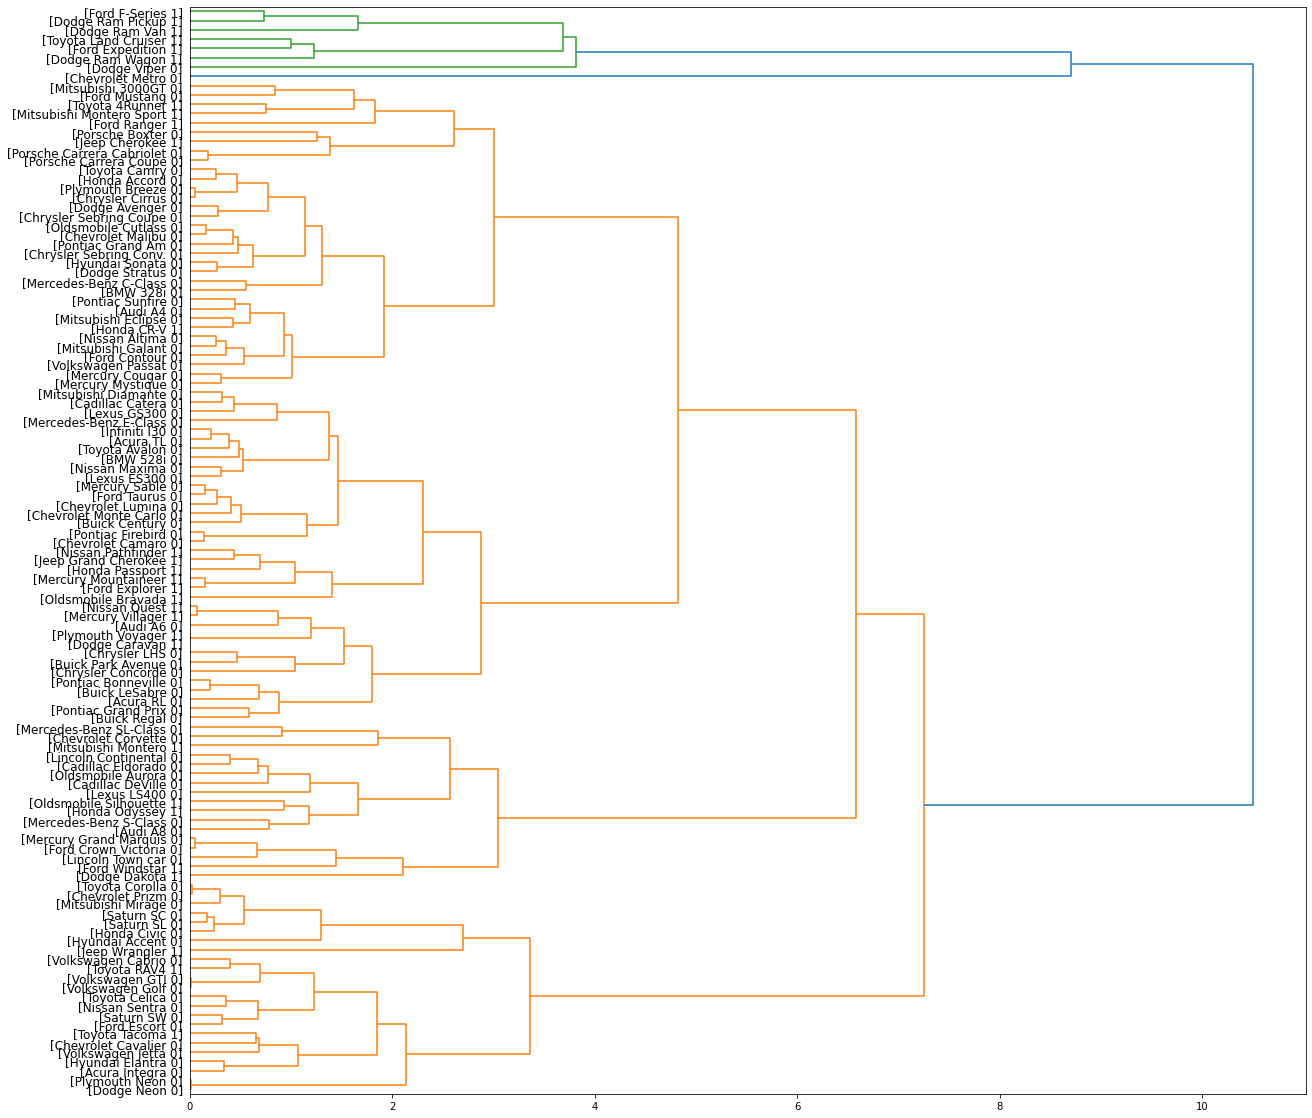

In [53]:
hierarchialMaker = hierarchy.linkage(distance_matrix,"complete")
Figure = pylab.figure(figsize=(20,20))
dendroGramSkLearn = hierarchy.dendrogram(hierarchialMaker,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')